In [5]:
### Time Series Analysis
import pandas as pd
import openpyxl
import matplotlib.pyplot as plt
%matplotlib inline

import statsmodels.api as sm
## forecasting
from statsmodels.tsa.statespace.sarimax import SARIMAX



In [6]:
df=pd.read_excel(r"c:\Users\Anjali\Downloads\Lilly_Time_Series_Forecasting_Assignment.xlsx",sheet_name="Quarterly Series")
df

,Time,Series 1,Series 2
0,15Q1,2856115.0,3188182.5
1,15Q2,2938482.0,3138189.5
2,15Q3,2855551.0,3032241.5
3,15Q4,3240672.0,3070864.5
4,16Q1,3171765.0,3435644.0
5,16Q2,3260624.0,3387872.5
6,16Q3,3257929.5,3401259.0
7,16Q4,3585015.5,3336460.5
8,17Q1,3389152.0,3712335.5
9,17Q2,3678904.0,3626486.0


In [7]:
df['Time'] = pd.to_datetime(df['Time'])
# Set 'Month' as the index
df.set_index('Time', inplace=True)
df


,Series 1,Series 2
Time,,
2015-01-01,2856115.0,3188182.5
2015-04-01,2938482.0,3138189.5
2015-07-01,2855551.0,3032241.5
2015-10-01,3240672.0,3070864.5
2016-01-01,3171765.0,3435644.0
2016-04-01,3260624.0,3387872.5
2016-07-01,3257929.5,3401259.0
2016-10-01,3585015.5,3336460.5
2017-01-01,3389152.0,3712335.5


count    3.300000e+01
mean     2.965364e+06
std      1.264088e+06
min      5.842450e+04
25%      2.964515e+06
50%      3.401259e+06
75%      3.904979e+06
max      4.274220e+06
Name: Series 2, dtype: float64


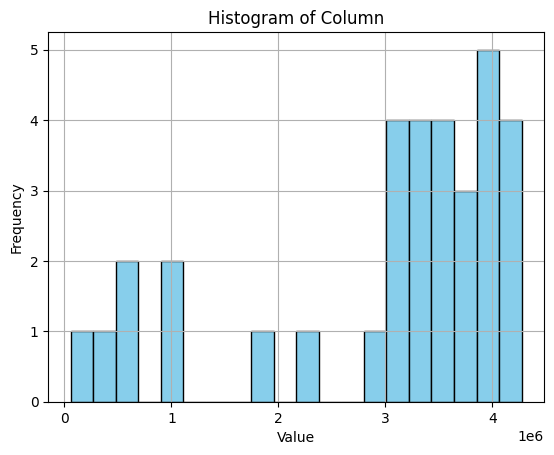

In [31]:
import pandas as pd

# Assuming you have a DataFrame called df with a column named 'column'
# You can use describe() to get summary statistics
summary_stats = df['Series 2'].describe()
print(summary_stats)

# You can also directly visualize the distribution using built-in plotting functions
# For example, let's plot a histogram
df['Series 2'].hist(bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of Column')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()


<AxesSubplot: xlabel='Time'>

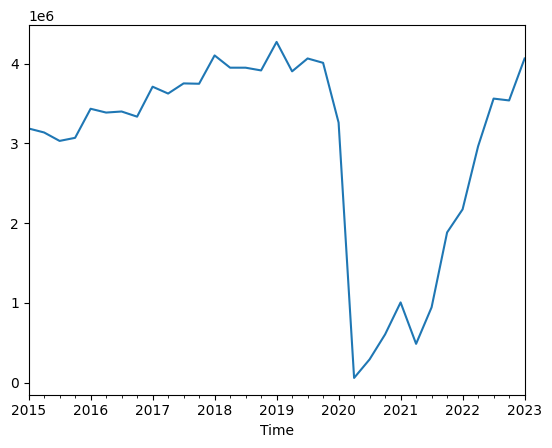

In [8]:
df['Series 2'].plot()

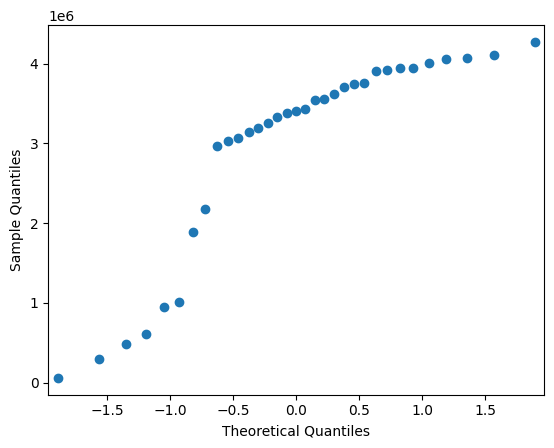

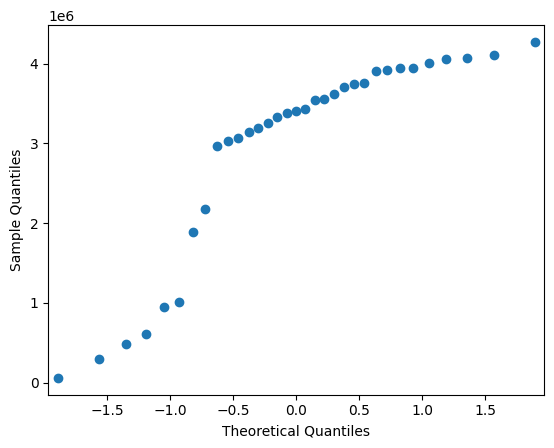

In [9]:
sm.qqplot(df['Series 2'])

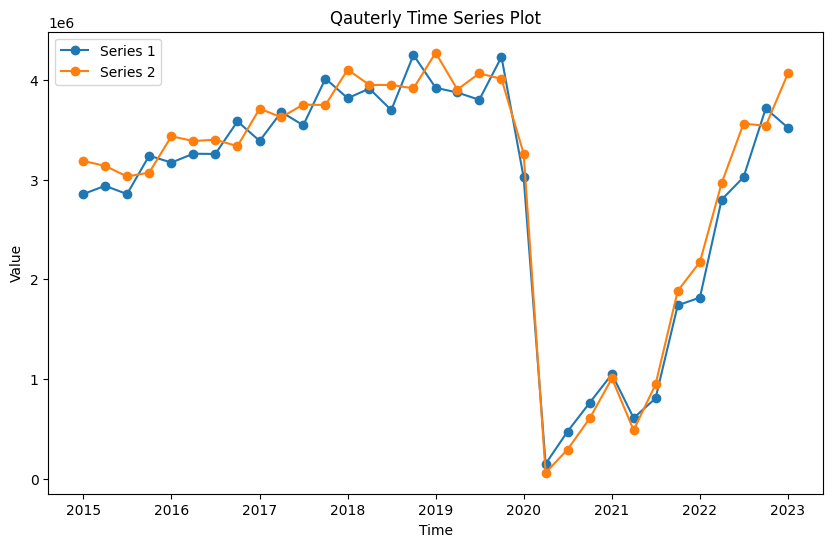

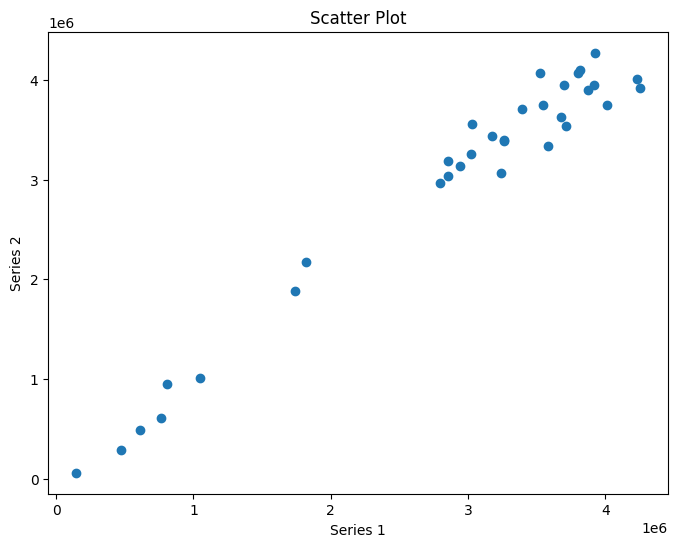

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your data is stored in a DataFrame called 'df'
# Plot time series data
plt.figure(figsize=(10, 6))
plt.plot( df['Series 1'], label='Series 1',marker='o', )
plt.plot( df['Series 2'], label='Series 2',marker='o', )
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Qauterly Time Series Plot')
plt.legend()
plt.show()

# Plot correlation between Series 1 and Series 2
plt.figure(figsize=(8, 6))
plt.scatter(df['Series 1'], df['Series 2'])
plt.xlabel('Series 1')
plt.ylabel('Series 2')
plt.title('Scatter Plot')
plt.show()




In [ ]:
# # Plot cross-correlation
# plt.figure(figsize=(10, 6))
# pd.plotting.autocorrelation_plot(df['Series 1'], label='Series 1')
# pd.plotting.autocorrelation_plot(df['Series 2'], label='Series 2')
# plt.title('Cross-Correlation Plot')
# plt.legend()
# plt.show()

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Perform seasonal decomposition for Series 1
result_series1 = seasonal_decompose(df['Series 1'], model='additive', period=4)  
# Perform seasonal decomposition for Series 2
result_series2 = seasonal_decompose(df['Series 2'], model='additive', period=4)  

# Plot the decompositions for Series 1
plt.figure(figsize=(12, 8))

plt.subplot(411)
plt.plot(df.index, df['Series 1'], label='Original Series 1')
plt.legend()

plt.subplot(412)
plt.plot(df.index, result_series1.trend, label='Trend Series 1')
plt.legend()

plt.subplot(413)
plt.plot(df.index, result_series1.seasonal, label='Seasonality Series 1')
plt.legend()

plt.subplot(414)
plt.plot(df.index, result_series1.resid, label='Residuals Series 1')
plt.legend()

plt.tight_layout()
plt.show()

# Plot the decompositions for Series 2
plt.figure(figsize=(12, 8))

plt.subplot(411)
plt.plot(df.index, df['Series 2'], label='Original Series 2')
plt.legend()

plt.subplot(412)
plt.plot(df.index, result_series2.trend, label='Trend Series 2')
plt.legend()

plt.subplot(413)
plt.plot(df.index, result_series2.seasonal, label='Seasonality Series 2')
plt.legend()

plt.subplot(414)
plt.plot(df.index, result_series2.resid, label='Residuals Series 2')
plt.legend()

plt.tight_layout()
plt.show()

In [33]:
### check stationarity
from statsmodels.tsa.stattools import adfuller

# Assume `series` is your time series data.
adf_result = adfuller(df['Series 1'])

print('ADF Statistic: %f' % adf_result[0])
print('p-value: %f' % adf_result[1])
print('Critical Values:')
for key, value in adf_result[4].items():
    print('\t%s: %.3f' % (key, value))

# Interpretation
if adf_result[1] < 0.05:
    print("Reject the null hypothesis (H0), the data does not have a unit root and is stationary.")
else:
    print("Fail to reject the null hypothesis (H0), the data may have a unit root and is non-stationary.")


ADF Statistic: -1.506516
p-value: 0.530285
Critical Values:
	1%: -3.654
	5%: -2.957
	10%: -2.618
Fail to reject the null hypothesis (H0), the data may have a unit root and is non-stationary.


<Figure size 1000x600 with 0 Axes>

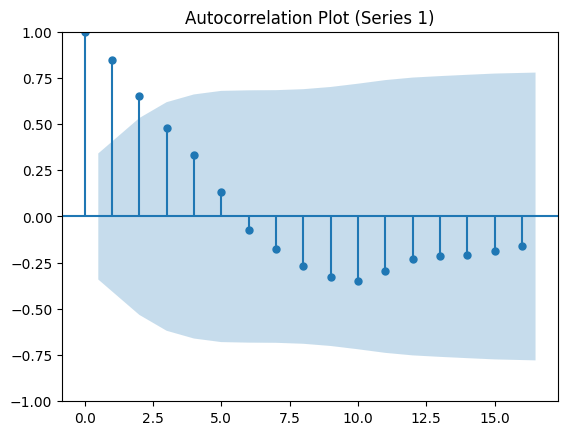

<Figure size 1000x600 with 0 Axes>

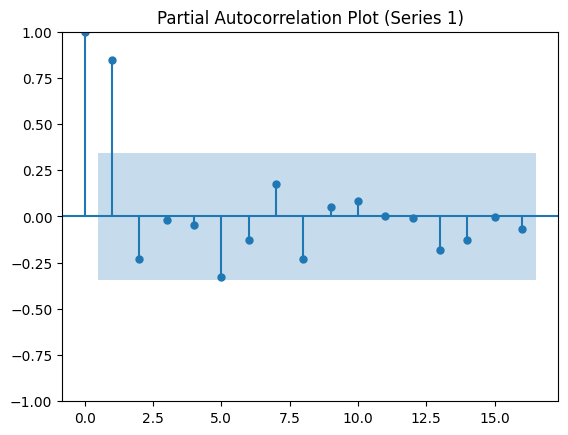

In [34]:
# Plot autocorrelation and partial autocorrelation
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plt.figure(figsize=(10, 6))
plot_acf(df['Series 1'], lags=16)
plt.title('Autocorrelation Plot (Series 1)')
plt.show()

plt.figure(figsize=(10, 6))
plot_pacf(df['Series 1'], lags=16)
plt.title('Partial Autocorrelation Plot (Series 1)')
plt.show()



In [35]:
# from statsmodels.tsa.statespace.sarimax import SARIMAX
# from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# import matplotlib.pyplot as plt

# # Assuming the seasonal period is 4 (quarterly data)
# seasonal_period = 4

# # Seasonal differencing for Series 1 and Series 2
# df['Differenced_Series1'] = df['Series 1'].diff(seasonal_period)
# df['Differenced_Series2'] = df['Series 2'].diff(seasonal_period)

# # Dropping the NaN values that come from differencing
# df_differenced = df.dropna()

# # Plotting the differenced series
# fig, axes = plt.subplots(2, 1, figsize=(10, 8))

# # Plot the ACF and PACF for Series 1
# plot_acf(df_differenced['Differenced_Series1'], ax=axes[0], title='ACF for Differenced Series 1')
# plot_pacf(df_differenced['Differenced_Series1'], ax=axes[1], title='PACF for Differenced Series 1')

# plt.tight_layout()
# plt.show()

# # We'll need to look at these plots to determine the (p,d,q) and (P,D,Q,s) parameters for the SARIMA model.


In [11]:
import pmdarima as pmd

#model_1=pmd.auto_arima(df['Series 1'],start_p=1,start_q=1,test='adf',m=4,seasonal=True,trace=True)
model1 = pmd.auto_arima(df['Series 2'], 
                        seasonal=True, 
                        m=4, 
                        d=1, D=1, 
                        start_p=0, start_q=0, 
                        max_p=2, max_q=2, 
                        start_P=0, start_Q=0, 
                        max_P=2, max_Q=2, 
                        information_criterion='aic', 
                        trace=True, 
                        error_action='ignore', 
                        suppress_warnings=True, 
                        stepwise=True)

# Summarize model
model1.summary()

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[4]             : AIC=847.792, Time=0.02 sec
 ARIMA(1,1,0)(1,1,0)[4]             : AIC=847.709, Time=0.03 sec
 ARIMA(0,1,1)(0,1,1)[4]             : AIC=844.945, Time=0.04 sec
 ARIMA(0,1,1)(0,1,0)[4]             : AIC=847.479, Time=0.02 sec
 ARIMA(0,1,1)(1,1,1)[4]             : AIC=846.075, Time=0.08 sec
 ARIMA(0,1,1)(0,1,2)[4]             : AIC=845.699, Time=0.07 sec
 ARIMA(0,1,1)(1,1,0)[4]             : AIC=848.129, Time=0.03 sec
 ARIMA(0,1,1)(1,1,2)[4]             : AIC=847.658, Time=0.09 sec
 ARIMA(0,1,0)(0,1,1)[4]             : AIC=847.548, Time=0.02 sec
 ARIMA(1,1,1)(0,1,1)[4]             : AIC=846.889, Time=0.05 sec
 ARIMA(0,1,2)(0,1,1)[4]             : AIC=848.924, Time=0.05 sec
 ARIMA(1,1,0)(0,1,1)[4]             : AIC=844.195, Time=0.03 sec
 ARIMA(1,1,0)(0,1,0)[4]             : AIC=847.214, Time=0.01 sec
 ARIMA(1,1,0)(1,1,1)[4]             : AIC=845.063, Time=0.08 sec
 ARIMA(1,1,0)(0,1,2)[4]             : AIC=844.6

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                   33
Model:             SARIMAX(1, 1, 0)x(0, 1, [1], 4)   Log Likelihood                -419.098
Date:                             Wed, 10 Apr 2024   AIC                            844.195
Time:                                     07:51:09   BIC                            848.192
Sample:                                 01-01-2015   HQIC                           845.417
                                      - 01-01-2023                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2547      0.151      1.685      0.092      -0.042       0.551
ma.S.L4       -0.7010      0.237     -2.963      0.003      -1.165      -0.237
sigma2      7.055e+11   1.24e-13   5.67e+24      0.000    7.05e+11    7.05e+11
===================================================================================
Ljung-Box (L1) (Q):                   0.13   Jarque-Bera (JB):                30.84
Prob(Q):                              0.72   Prob(JB):                         0.00
Heteroskedasticity (H):               4.00   Skew:                            -1.29
Prob(H) (two-sided):                  0.05   Kurtosis:                         7.45
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 9.81e+39. Standard errors may be unstable.
"""

In [12]:
# Use the SARIMA(1,1,0)(0,1,2)[4] model to fit the Series 1 data
model1 = SARIMAX(df['Series 2'], order=(1, 1, 0), seasonal_order=(0, 1, 1, 4))

# Fit the model
results1 = model1.fit()

# Forecast the next 12 time steps
forecast1 = results1.get_forecast(steps=12)

# The forecast object contains several attributes, including predicted means, confidence intervals, etc.
predicted_means1 = forecast1.predicted_mean
confidence_intervals1 = forecast1.conf_int()

# #the last date in the PeriodIndex
last_date = df.index[-1]

# # Generate a new PeriodIndex for the forecast which continues from the last_date
# forecast_index = pd.period_range(start=last_date, periods=13, freq='Q')[1:]  # Exclude the first period which is the last_date itself

# Convert the forecast to a DataFrame for easy handling
forecast_df1 = pd.DataFrame({
    'Forecast': predicted_means1,
    'Lower CI': confidence_intervals1.iloc[:, 0],
    'Upper CI': confidence_intervals1.iloc[:, 1]
})

print(forecast_df1)

                Forecast      Lower CI      Upper CI
2023-04-01  3.724692e+06  2.077786e+06  5.371597e+06
2023-07-01  4.071993e+06  1.429654e+06  6.714331e+06
2023-10-01  4.297972e+06  8.768168e+05  7.719126e+06
2024-01-01  4.643733e+06  5.763459e+05  8.711120e+06
2024-04-01  4.256284e+06 -6.258667e+05  9.138434e+06
2024-07-01  4.591883e+06 -1.050059e+06  1.023383e+07
2024-10-01  4.814882e+06 -1.510568e+06  1.114033e+07
2025-01-01  5.159884e+06 -1.785139e+06  1.210491e+07
2025-04-01  4.772242e+06 -2.944257e+06  1.248874e+07
2025-07-01  5.107792e+06 -3.360981e+06  1.357657e+07
2025-10-01  5.330779e+06 -3.840893e+06  1.450245e+07
2026-01-01  5.675778e+06 -4.151147e+06  1.550270e+07


c:\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
c:\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)


In [44]:
forecast_df1.index

DatetimeIndex(['2023-04-01', '2023-07-01', '2023-10-01', '2024-01-01',
               '2024-04-01', '2024-07-01', '2024-10-01', '2025-01-01',
               '2025-04-01', '2025-07-01', '2025-10-01', '2026-01-01'],
              dtype='datetime64[ns]', freq='QS-OCT')

In [13]:
def to_year_quarter(dt):
    year_str = str(dt.year)[2:]  # get the last two digits of the year
    quarter_str = 'Q' + str((dt.month - 1) // 3 + 1)  # get the quarter
    return year_str + quarter_str

# Apply the function to the index and assign it back to the DataFrame
#df.index = df.index.map(to_year_quarter)


In [ ]:
# Convert the index for plotting
#df.index = df.index.map(to_year_quarter)


In [14]:
## Convert historical data index to quarter strings like '23Q1'
df.index = df.index.to_period('Q').strftime('%yQ%q')

df


,Series 1,Series 2
Time,,
15Q1,2856115.0,3188182.5
15Q2,2938482.0,3138189.5
15Q3,2855551.0,3032241.5
15Q4,3240672.0,3070864.5
16Q1,3171765.0,3435644.0
16Q2,3260624.0,3387872.5
16Q3,3257929.5,3401259.0
16Q4,3585015.5,3336460.5
17Q1,3389152.0,3712335.5


In [15]:
# Convert forecast index to quarter strings like '23Q2'
forecast_df1.index = pd.date_range(start=last_date + pd.offsets.QuarterBegin(startingMonth=1), periods=12, freq='Q')
forecast_df1.index = forecast_df1.index.to_period('Q').strftime('%yQ%q')


In [48]:
forecast_df1

,Forecast,Lower CI,Upper CI
2023-04-01,3.724692e+06,2.077786e+06,5.371597e+06
2023-07-01,4.071993e+06,1.429654e+06,6.714331e+06
2023-10-01,4.297972e+06,8.768168e+05,7.719126e+06
2024-01-01,4.643733e+06,5.763459e+05,8.711120e+06
2024-04-01,4.256284e+06,-6.258667e+05,9.138434e+06
2024-07-01,4.591883e+06,-1.050059e+06,1.023383e+07
2024-10-01,4.814882e+06,-1.510568e+06,1.114033e+07
2025-01-01,5.159884e+06,-1.785139e+06,1.210491e+07
2025-04-01,4.772242e+06,-2.944257e+06,1.248874e+07
2025-07-01,5.107792e+06,-3.360981e+06,1.357657e+07


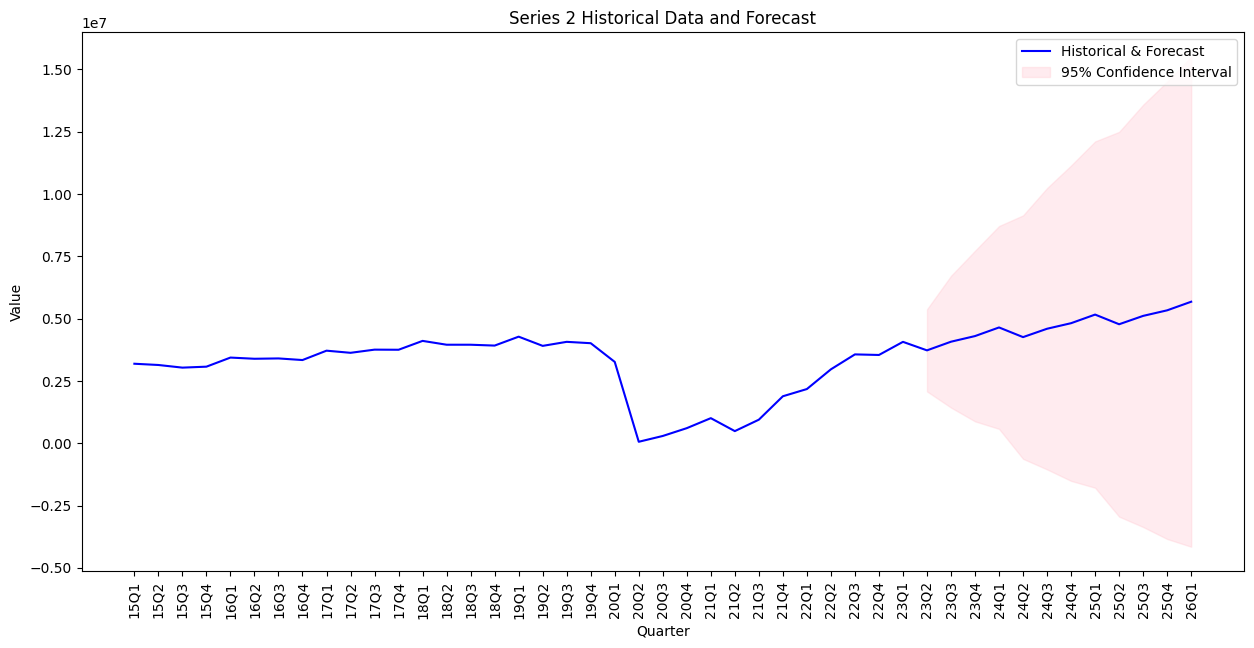

In [17]:
import matplotlib.pyplot as plt

# Combine historical and forecasted data for plotting
combined_df = pd.concat([df['Series 2'], forecast_df1['Forecast']])

# Plotting
plt.figure(figsize=(15, 7))
plt.plot(combined_df.index, combined_df, label='Historical & Forecast', color='blue')
plt.fill_between(forecast_df1.index, forecast_df1['Lower CI'], forecast_df1['Upper CI'], color='pink', alpha=0.3, label='95% Confidence Interval')
plt.title('Series 2 Historical Data and Forecast')
plt.xlabel('Quarter')
plt.ylabel('Value')
# Rotate x-axis labels for better readability and set a reasonable interval
plt.xticks(rotation=90)
plt.legend()
plt.show()


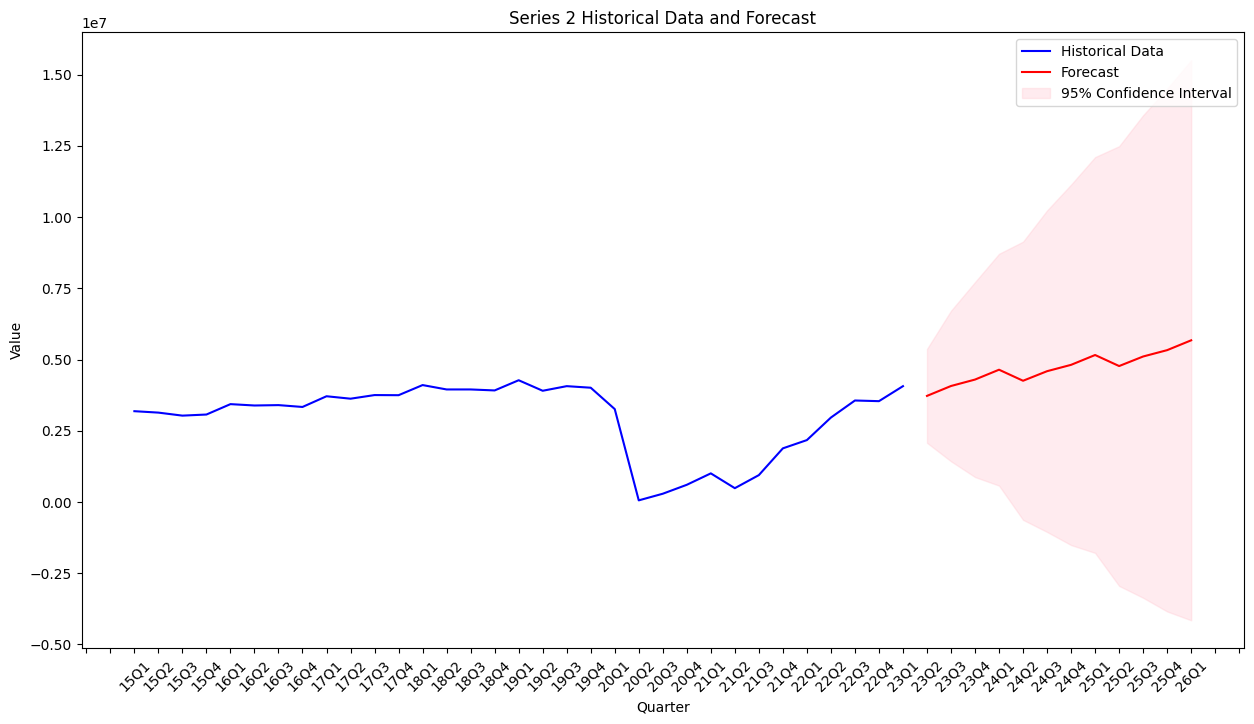

In [16]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Plot historical data
plt.figure(figsize=(15, 8))  # Adjust figure size to make room for x-axis labels
plt.plot(df.index, df['Series 2'], label='Historical Data', color='blue')

# Assume forecast_df1 has been aligned properly with df and has a 'Forecast' column
plt.plot(forecast_df1.index, forecast_df1['Forecast'], label='Forecast', color='red')

# Plot the confidence interval
plt.fill_between(forecast_df1.index, forecast_df1['Lower CI'], forecast_df1['Upper CI'], color='pink', alpha=0.3, label='95% Confidence Interval')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Set the x-axis labels to display every quarter
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(1))  # Show every label (adjust this if it's too dense)

# Title and labels
plt.title('Series 2 Historical Data and Forecast')
plt.xlabel('Quarter')
plt.ylabel('Value')

# Legend
plt.legend()

# Show the plot
plt.show()


In [ ]:
## Series 2
# Plot autocorrelation and partial autocorrelation
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plt.figure(figsize=(10, 6))
plot_acf(df['Series 2'], lags=16)
plt.title('Autocorrelation Plot (Series 2)')
plt.show()

plt.figure(figsize=(10, 6))
plot_pacf(df['Series 2'], lags=16)
plt.title('Partial Autocorrelation Plot (Series 2)')
plt.show()



In [13]:
import pmdarima as pmd

#model_1=pmd.auto_arima(df['Series 1'],start_p=1,start_q=1,test='adf',m=4,seasonal=True,trace=True)
model2 = pmd.auto_arima(df['Series 2'], 
                        seasonal=True, 
                        m=4, 
                        d=1, D=1, 
                        start_p=0, start_q=0, 
                        max_p=2, max_q=2, 
                        start_P=0, start_Q=0, 
                        max_P=2, max_Q=2, 
                        information_criterion='aic', 
                        trace=True, 
                        error_action='ignore', 
                        suppress_warnings=True, 
                        stepwise=True)

# Summarize model
model2.summary()

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[4]             : AIC=847.792, Time=0.01 sec
 ARIMA(1,1,0)(1,1,0)[4]             : AIC=847.709, Time=0.03 sec
 ARIMA(0,1,1)(0,1,1)[4]             : AIC=844.945, Time=0.03 sec
 ARIMA(0,1,1)(0,1,0)[4]             : AIC=847.479, Time=0.02 sec
 ARIMA(0,1,1)(1,1,1)[4]             : AIC=846.075, Time=0.05 sec
 ARIMA(0,1,1)(0,1,2)[4]             : AIC=845.699, Time=0.05 sec
 ARIMA(0,1,1)(1,1,0)[4]             : AIC=848.129, Time=0.02 sec
 ARIMA(0,1,1)(1,1,2)[4]             : AIC=847.658, Time=0.07 sec
 ARIMA(0,1,0)(0,1,1)[4]             : AIC=847.548, Time=0.02 sec
 ARIMA(1,1,1)(0,1,1)[4]             : AIC=846.889, Time=0.03 sec
 ARIMA(0,1,2)(0,1,1)[4]             : AIC=848.924, Time=0.03 sec
 ARIMA(1,1,0)(0,1,1)[4]             : AIC=844.195, Time=0.02 sec
 ARIMA(1,1,0)(0,1,0)[4]             : AIC=847.214, Time=0.02 sec
 ARIMA(1,1,0)(1,1,1)[4]             : AIC=845.063, Time=0.05 sec
 ARIMA(1,1,0)(0,1,2)[4]             : AIC=844.6

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                   33
Model:             SARIMAX(1, 1, 0)x(0, 1, [1], 4)   Log Likelihood                -419.098
Date:                             Tue, 09 Apr 2024   AIC                            844.195
Time:                                     23:40:21   BIC                            848.192
Sample:                                 01-01-2015   HQIC                           845.417
                                      - 01-01-2023                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2547      0.151      1.685      0.092      -0.042       0.551
ma.S.L4       -0.7010      0.237     -2.963      0.003      -1.165      -0.237
sigma2      7.055e+11   1.24e-13   5.67e+24      0.000    7.05e+11    7.05e+11
===================================================================================
Ljung-Box (L1) (Q):                   0.13   Jarque-Bera (JB):                30.84
Prob(Q):                              0.72   Prob(JB):                         0.00
Heteroskedasticity (H):               4.00   Skew:                            -1.29
Prob(H) (two-sided):                  0.05   Kurtosis:                         7.45
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 9.81e+39. Standard errors may be unstable.
"""

In [8]:
# Use the SARIMA(1,1,0)(0,1,2)[4] model to fit the Series 1 data
model2 = SARIMAX(df['Series 2'], order=(1, 1, 0), seasonal_order=(0, 1, 1, 4))

# Fit the model
results2 = model2.fit()

# Forecast the next 12 time steps
forecast2 = results2.get_forecast(steps=12)

# The forecast object contains several attributes, including predicted means, confidence intervals, etc.
predicted_means2 = forecast2.predicted_mean
confidence_intervals2 = forecast2.conf_int()

# #the last date in the PeriodIndex
last_date = df.index[-1]

# # Generate a new PeriodIndex for the forecast which continues from the last_date
# forecast_index = pd.period_range(start=last_date, periods=13, freq='Q')[1:]  # Exclude the first period which is the last_date itself

# Convert the forecast to a DataFrame for easy handling
forecast_df2 = pd.DataFrame({
    'Forecast': predicted_means2,
    'Lower CI': confidence_intervals2.iloc[:, 0],
    'Upper CI': confidence_intervals2.iloc[:, 1]
})

print(forecast_df2)

                Forecast      Lower CI      Upper CI
2023-04-01  3.724692e+06  2.077786e+06  5.371597e+06
2023-07-01  4.071993e+06  1.429654e+06  6.714331e+06
2023-10-01  4.297972e+06  8.768168e+05  7.719126e+06
2024-01-01  4.643733e+06  5.763459e+05  8.711120e+06
2024-04-01  4.256284e+06 -6.258667e+05  9.138434e+06
2024-07-01  4.591883e+06 -1.050059e+06  1.023383e+07
2024-10-01  4.814882e+06 -1.510568e+06  1.114033e+07
2025-01-01  5.159884e+06 -1.785139e+06  1.210491e+07
2025-04-01  4.772242e+06 -2.944257e+06  1.248874e+07
2025-07-01  5.107792e+06 -3.360981e+06  1.357657e+07
2025-10-01  5.330779e+06 -3.840893e+06  1.450245e+07
2026-01-01  5.675778e+06 -4.151147e+06  1.550270e+07


c:\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
c:\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)


In [19]:
df

,Series 1,Series 2
Time,,
2015-01-01,2856115.0,3188182.5
2015-04-01,2938482.0,3138189.5
2015-07-01,2855551.0,3032241.5
2015-10-01,3240672.0,3070864.5
2016-01-01,3171765.0,3435644.0
2016-04-01,3260624.0,3387872.5
2016-07-01,3257929.5,3401259.0
2016-10-01,3585015.5,3336460.5
2017-01-01,3389152.0,3712335.5


In [20]:
# from statsmodels.tsa.statespace.sarimax import SARIMAX
# import matplotlib.pyplot as plt
# import pandas as pd

# # Assuming 'df' is your DataFrame with 'Series 2' data and the time index properly set
# # ... [your existing SARIMA modeling code] ...

# # Fit the SARIMA(1,1,0)(0,1,2)[4] model
# model2 = SARIMAX(df['Series 2'], order=(1, 1, 0), seasonal_order=(0, 1, 2, 4))
# results2 = model2.fit()

# # Forecast the next 12 time steps
# forecast2 = results2.get_forecast(steps=12)
# predicted_means2 = forecast2.predicted_mean
# confidence_intervals2 = forecast2.conf_int()

# # The last date in the time index
# last_date = df.index[-1]

# # Generate a new PeriodIndex for the forecast which continues from the last_date
# forecast_index = pd.period_range(start=last_date, periods=13, freq='Q')[1:]  # Exclude the first period which is the last_date itself

# # Plot the actual data
# plt.figure(figsize=(10, 6))
# plt.plot(df.index, df['Series 2'], label='Actual Data')

# # Plot the forecasted data
# plt.plot(forecast_index, predicted_means2, color='orange', label='Forecast')

# # Plot the confidence intervals
# plt.fill_between(forecast_index, confidence_intervals2.iloc[:, 0], confidence_intervals2.iloc[:, 1], color='orange', alpha=0.3)

# # Add title and labels
# plt.title('Actual Data and SARIMA Forecast')
# plt.xlabel('Date')
# plt.ylabel('Value')

# # Show the legend
# plt.legend()

# # Show the plot
# plt.show()


In [14]:
# Convert forecast index to quarter strings like '23Q2'
forecast_df2.index = pd.date_range(start=last_date + pd.offsets.QuarterBegin(startingMonth=1), periods=12, freq='Q')
forecast_df2.index = forecast_df2.index.to_period('Q').strftime('%yQ%q')


ConversionError: Failed to convert value(s) to axis units: array([Timestamp('2015-01-01 00:00:00'), Timestamp('2015-04-01 00:00:00'),
       Timestamp('2015-07-01 00:00:00'), Timestamp('2015-10-01 00:00:00'),
       Timestamp('2016-01-01 00:00:00'), Timestamp('2016-04-01 00:00:00'),
       Timestamp('2016-07-01 00:00:00'), Timestamp('2016-10-01 00:00:00'),
       Timestamp('2017-01-01 00:00:00'), Timestamp('2017-04-01 00:00:00'),
       Timestamp('2017-07-01 00:00:00'), Timestamp('2017-10-01 00:00:00'),
       Timestamp('2018-01-01 00:00:00'), Timestamp('2018-04-01 00:00:00'),
       Timestamp('2018-07-01 00:00:00'), Timestamp('2018-10-01 00:00:00'),
       Timestamp('2019-01-01 00:00:00'), Timestamp('2019-04-01 00:00:00'),
       Timestamp('2019-07-01 00:00:00'), Timestamp('2019-10-01 00:00:00'),
       Timestamp('2020-01-01 00:00:00'), Timestamp('2020-04-01 00:00:00'),
       Timestamp('2020-07-01 00:00:00'), Timestamp('2020-10-01 00:00:00'),
       Timestamp('2021-01-01 00:00:00'), Timestamp('2021-04-01 00:00:00'),
       Timestamp('2021-07-01 00:00:00'), Timestamp('2021-10-01 00:00:00'),
       Timestamp('2022-01-01 00:00:00'), Timestamp('2022-04-01 00:00:00'),
       Timestamp('2022-07-01 00:00:00'), Timestamp('2022-10-01 00:00:00'),
       Timestamp('2023-01-01 00:00:00'), '23Q2', '23Q3', '23Q4', '24Q1',
       '24Q2', '24Q3', '24Q4', '25Q1', '25Q2', '25Q3', '25Q4', '26Q1'],
      dtype=object)

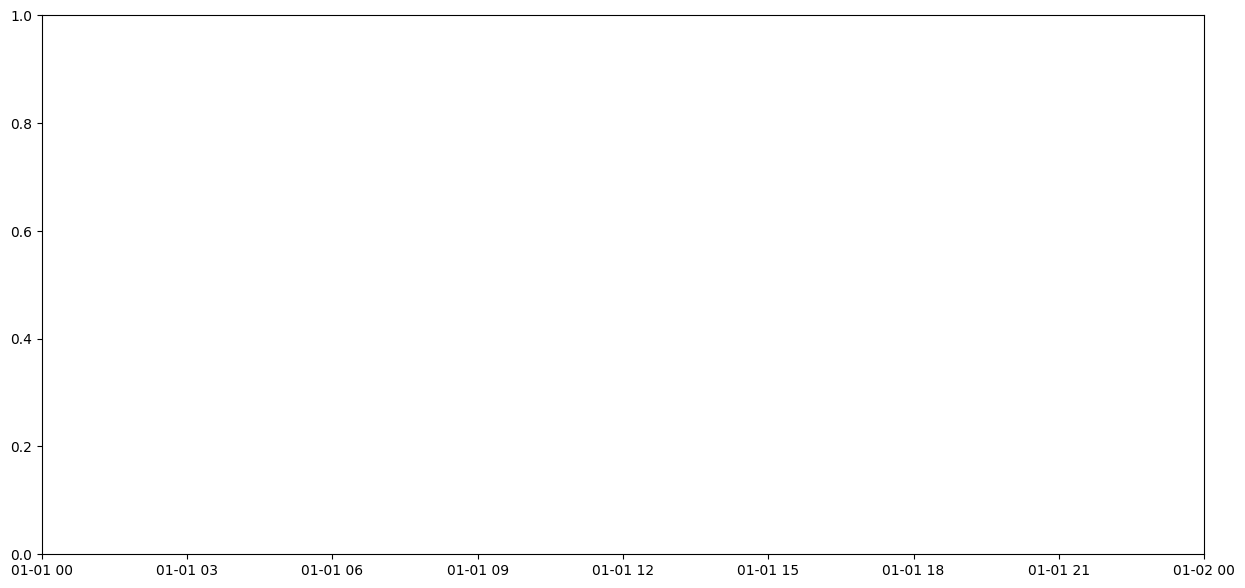

In [15]:
import matplotlib.pyplot as plt

# Combine historical and forecasted data for plotting
combined_df = pd.concat([df['Series 2'], forecast_df2['Forecast']])

# Plotting
plt.figure(figsize=(15, 7))
plt.plot(combined_df.index, combined_df, label='Historical & Forecast', color='blue')
plt.fill_between(forecast_df2.index, forecast_df2['Lower CI'], forecast_df2['Upper CI'], color='pink', alpha=0.3, label='95% Confidence Interval')
plt.title('Series 2 Historical Data and Forecast')
plt.xlabel('Quarter')
plt.ylabel('Value')
# Rotate x-axis labels for better readability and set a reasonable interval
plt.xticks(rotation=90)
plt.legend()
plt.show()

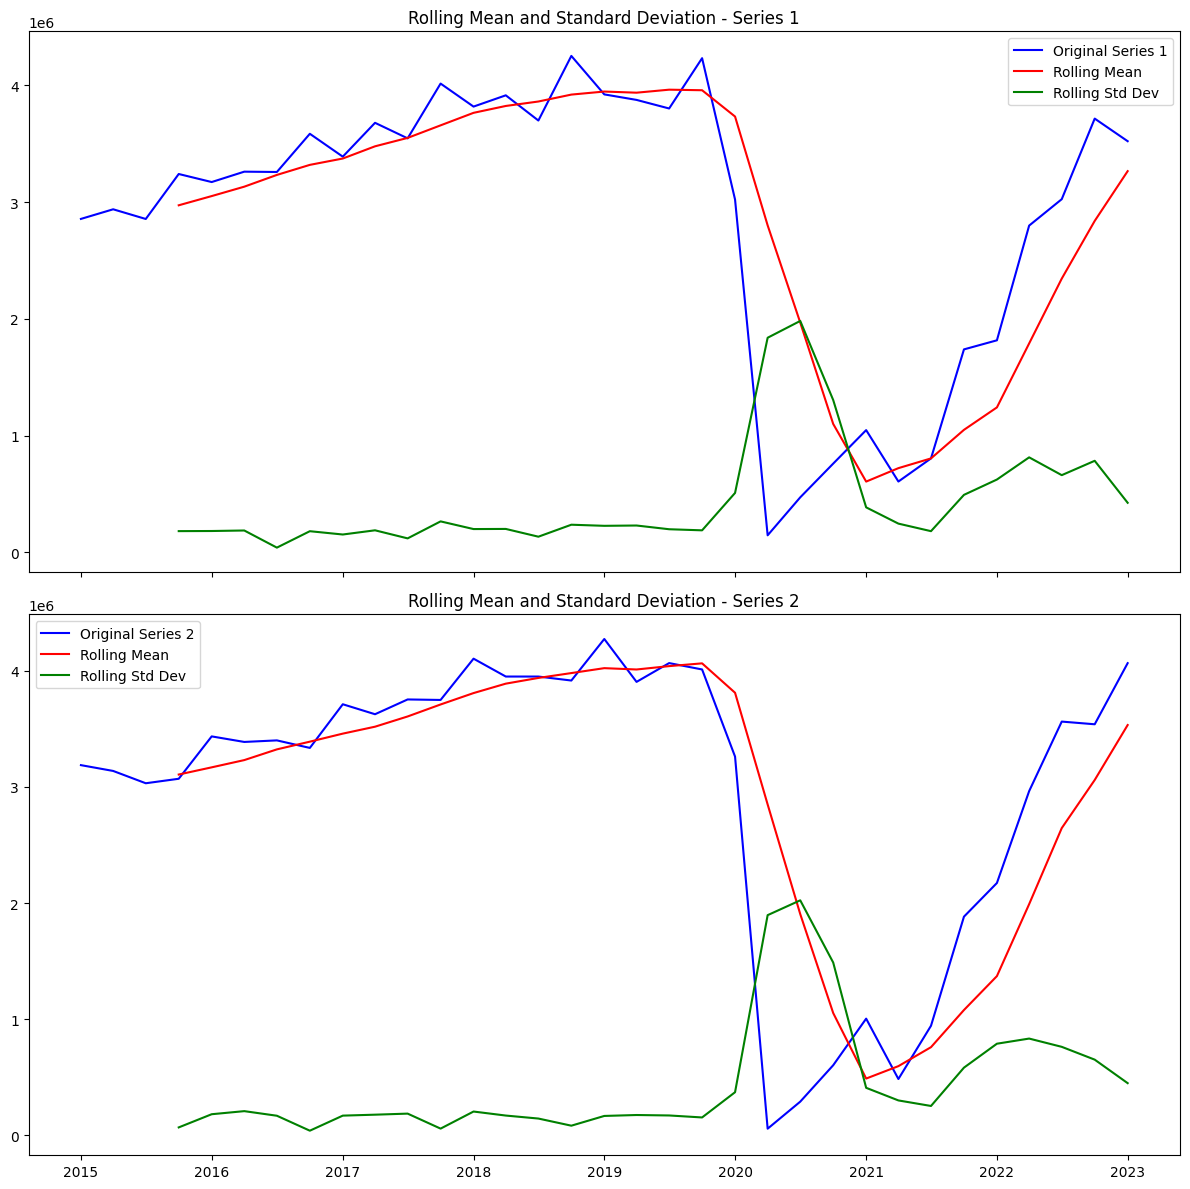

In [16]:
# Calculate rolling mean and standard deviation with a window of 12 months
rolling_window = 4
df_rolling_mean = df.rolling(window=rolling_window).mean()
df_rolling_std = df.rolling(window=rolling_window).std()

# Plotting
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 12), sharex=True)
for i, series in enumerate(df.columns):
    axes[i].plot(df.index, df[series], label=f'Original {series}', color='blue')
    axes[i].plot(df_rolling_mean.index, df_rolling_mean[series], label='Rolling Mean', color='red')
    axes[i].plot(df_rolling_std.index, df_rolling_std[series], label='Rolling Std Dev', color='green')
    axes[i].set_title(f'Rolling Mean and Standard Deviation - {series}')
    axes[i].legend()
    plt.savefig(f"Rolling Mean and Standard Deviation - {series}.png")
plt.tight_layout()
plt.show()

In [ ]:
results2.plot_diagnostics(figsize=(15, 12))

In [ ]:
import fbprophet 
from fbprophet import Prophet
from sklearn.metrics import mean_absolute_percentage_error

# Assuming 'df' is your DataFrame and it has two columns: 'ds' for the timestamp and 'y' for the values.

# Prepare the DataFrame for Prophet
df_prophet = df.reset_index().rename(columns={'Time': 'ds', 'Series 1': 'y'})

# Initialize the Prophet model
model = Prophet()

# Fit the model
model.fit(df_prophet)

# Create a DataFrame for future predictions
future = model.make_future_dataframe(periods=12, freq='Q')

# Make predictions
forecast = model.predict(future)

# Calculate MAPE on the test set, assuming you have test data to compare
y_true = df_test['y']  # Actual values from your test set
y_pred = forecast['yhat'][-len(df_test):]  # Predicted values for the test set
mape = mean_absolute_percentage_error(y_true, y_pred)

print(f'MAPE: {mape}')

# Plot the forecast
fig = model.plot(forecast)


In [ ]:
df

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,1,1)[4] intercept   : AIC=734.872, Time=0.20 sec
 ARIMA(0,0,0)(0,1,0)[4] intercept   : AIC=748.611, Time=0.01 sec
 ARIMA(1,0,0)(1,1,0)[4] intercept   : AIC=728.102, Time=0.04 sec
 ARIMA(0,0,1)(0,1,1)[4] intercept   : AIC=739.468, Time=0.06 sec
 ARIMA(0,0,0)(0,1,0)[4]             : AIC=748.284, Time=0.02 sec
 ARIMA(1,0,0)(0,1,0)[4] intercept   : AIC=733.303, Time=0.02 sec
 ARIMA(1,0,0)(2,1,0)[4] intercept   : AIC=729.909, Time=0.08 sec
 ARIMA(1,0,0)(1,1,1)[4] intercept   : AIC=729.753, Time=0.08 sec
 ARIMA(1,0,0)(0,1,1)[4] intercept   : AIC=728.138, Time=0.08 sec
 ARIMA(1,0,0)(2,1,1)[4] intercept   : AIC=731.047, Time=0.23 sec
 ARIMA(0,0,0)(1,1,0)[4] intercept   : AIC=750.588, Time=0.02 sec
 ARIMA(2,0,0)(1,1,0)[4] intercept   : AIC=729.358, Time=0.07 sec
 ARIMA(1,0,1)(1,1,0)[4] intercept   : AIC=730.172, Time=0.05 sec
 ARIMA(0,0,1)(1,1,0)[4] intercept   : AIC=739.450, Time=0.06 sec
 ARIMA(2,0,1)(1,1,0)[4] intercept   : AIC=730.7

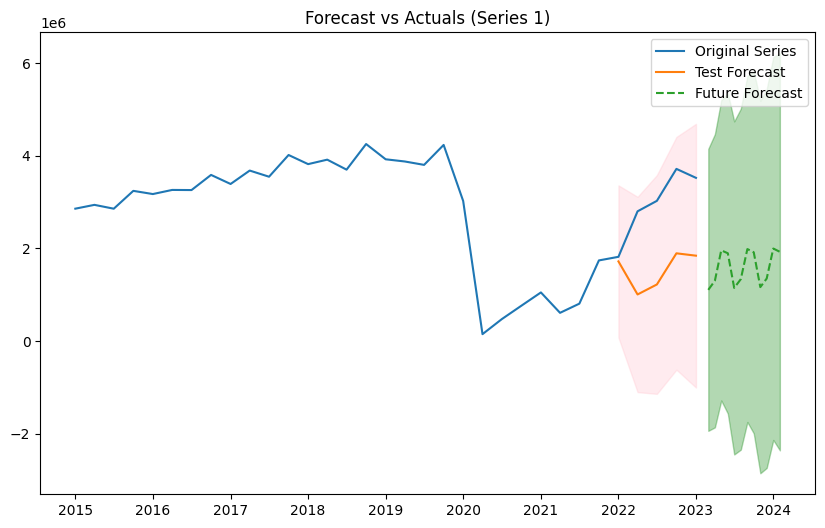

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,1,1)[4] intercept   : AIC=733.566, Time=0.17 sec
 ARIMA(0,0,0)(0,1,0)[4] intercept   : AIC=751.596, Time=0.01 sec
 ARIMA(1,0,0)(1,1,0)[4] intercept   : AIC=728.084, Time=0.04 sec
 ARIMA(0,0,1)(0,1,1)[4] intercept   : AIC=739.965, Time=0.05 sec
 ARIMA(0,0,0)(0,1,0)[4]             : AIC=751.245, Time=0.00 sec
 ARIMA(1,0,0)(0,1,0)[4] intercept   : AIC=734.707, Time=0.02 sec
 ARIMA(1,0,0)(2,1,0)[4] intercept   : AIC=729.680, Time=0.06 sec
 ARIMA(1,0,0)(1,1,1)[4] intercept   : AIC=729.586, Time=0.05 sec
 ARIMA(1,0,0)(0,1,1)[4] intercept   : AIC=728.278, Time=0.04 sec
 ARIMA(1,0,0)(2,1,1)[4] intercept   : AIC=730.979, Time=0.16 sec
 ARIMA(0,0,0)(1,1,0)[4] intercept   : AIC=753.587, Time=0.02 sec
 ARIMA(2,0,0)(1,1,0)[4] intercept   : AIC=727.427, Time=0.03 sec
 ARIMA(2,0,0)(0,1,0)[4] intercept   : AIC=732.318, Time=0.04 sec
 ARIMA(2,0,0)(2,1,0)[4] intercept   : AIC=729.325, Time=0.07 sec
 ARIMA(2,0,0)(1,1,1)[4] intercept   : AIC=729.2

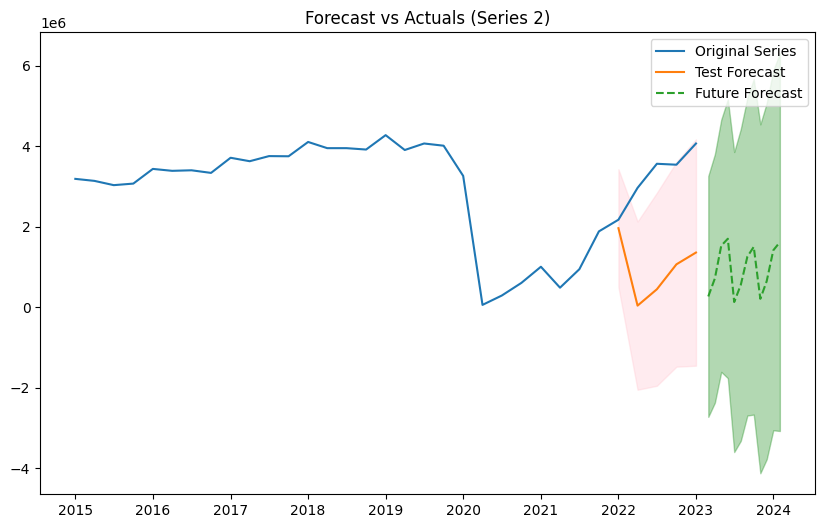

                Forecast Series 1  Forecast Series 2
Forecast Month                                      
2023-02-28                    NaN                NaN
2023-03-31                    NaN                NaN
2023-04-30                    NaN                NaN
2023-05-31                    NaN                NaN
2023-06-30                    NaN                NaN
2023-07-31                    NaN                NaN
2023-08-31                    NaN                NaN
2023-09-30                    NaN                NaN
2023-10-31                    NaN                NaN
2023-11-30                    NaN                NaN
2023-12-31                    NaN                NaN
2024-01-31                    NaN                NaN


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pmdarima import auto_arima
from sklearn.metrics import mean_absolute_percentage_error

# Define your df here with the actual data
# df = ...

# Define train and test data
train_size = 28  # # for training
test_size = 5 # Remaining for testing

results = {}
forecast_results = {}
future_forecasts = {}

# Analysis, forecasting, and plotting for each series
for series in df.columns:
    train = df[series][:train_size]
    test = df[series][train_size:]

    # Fit a seasonal ARIMA model automatically
    model = auto_arima(train, seasonal=True, m=4, trace=True, error_action='ignore', suppress_warnings=True)
    results[series] = model

    # Forecast the next 12 steps beyond the test set
    forecast, conf_int = model.predict(n_periods=test_size+12, return_conf_int=True)
    forecast_results[series] = forecast

    # Separate the future forecast from the test forecast
    test_forecast = forecast[:test_size]
    future_forecast = forecast[test_size:]
    future_forecasts[series] = future_forecast  # Storing future forecasts separately

    # Validation
    mape = mean_absolute_percentage_error(test, test_forecast)
    print(f'MAPE for {series}: {mape:.2f}')

    # Plotting the results
    plt.figure(figsize=(10, 6))
    plt.plot(df.index, df[series], label='Original Series')
    plt.plot(df.index[train_size:train_size + test_size], test_forecast, label='Test Forecast')

    # Calculate the start date for the future forecasts, which is the day after the last date in the index
    start_date = df.index[-1] + pd.DateOffset(months=1)

    # Generate the date range for the future forecasts
    future_dates = pd.date_range(start=start_date, periods=12, freq='M')

    # Plotting the future forecasts with the correct future dates
    plt.plot(future_dates, future_forecast, label='Future Forecast', linestyle='--')

    # Plotting the test forecast confidence intervals
    plt.fill_between(df.index[train_size:train_size + test_size],
                     conf_int[:test_size, 0], conf_int[:test_size, 1], color='pink', alpha=0.3)

    # Plotting the future forecast confidence intervals
    plt.fill_between(future_dates, conf_int[test_size:, 0], conf_int[test_size:, 1], color='green', alpha=0.3)

    plt.title(f'Forecast vs Actuals ({series})')
    plt.legend()
    plt.savefig(f'forecast_plots_{series}.png')  # Ensure each plot has a unique name
    plt.show()

# Creating a DataFrame for future forecasts
forecast_df = pd.DataFrame(future_forecasts, index=pd.date_range(start=df.index[-1] + pd.DateOffset(months=1), periods=12, freq='M'))
forecast_df.index.name = 'Forecast Month'
forecast_df.columns = [f'Forecast {col}' for col in forecast_df.columns]

print(forecast_df)
#forecast_df.to_csv('forecasts.csv')  # Saving the forecasts to a CSV file


In [6]:
forecast_results

{'Series 1': 2022-01-01    1.717680e+06
 2022-04-01    1.003923e+06
 2022-07-01    1.219821e+06
 2022-10-01    1.892334e+06
 2023-01-01    1.841275e+06
 2023-04-01    1.103482e+06
 2023-07-01    1.300018e+06
 2023-10-01    1.956935e+06
 2024-01-01    1.893312e+06
 2024-04-01    1.145399e+06
 2024-07-01    1.333783e+06
 2024-10-01    1.984134e+06
 2025-01-01    1.915222e+06
 2025-04-01    1.163048e+06
 2025-07-01    1.348000e+06
 2025-10-01    1.995586e+06
 2026-01-01    1.924447e+06
 Freq: QS-OCT, dtype: float64,
 'Series 2': 2022-01-01    1.963276e+06
 2022-04-01    4.005957e+04
 2022-07-01    4.466750e+05
 2022-10-01    1.065793e+06
 2023-01-01    1.358627e+06
 2023-04-01    2.684272e+05
 2023-07-01    7.157265e+05
 2023-10-01    1.528057e+06
 2024-01-01    1.701346e+06
 2024-04-01    1.294696e+05
 2024-07-01    5.551164e+05
 2024-10-01    1.256369e+06
 2025-01-01    1.500118e+06
 2025-04-01    2.091170e+05
 2025-07-01    6.477640e+05
 2025-10-01    1.413918e+06
 2026-01-01    1.6168

In [ ]:
model.plot_diagnostics()

## Monthly

In [ ]:
df_monthly=pd.read_excel(r"c:\Users\Anjali\Downloads\Lilly_Time_Series_Forecasting_Assignment.xlsx",sheet_name="Monthly Series")
df_monthly

In [ ]:
df_monthly['Month'] = pd.to_datetime(df_monthly['Month'], format='%b-%y')

In [ ]:
df_monthly

In [ ]:
# Set 'Month' as the index
df_monthly.set_index('Month', inplace=True)

# Plot each series
plt.figure(figsize=(15, 5))
for i in range(1, 4):
    plt.plot(df_monthly.index, df_monthly[f'Series {i}'], marker='o', label=f'Series {i}')
    plt.title('Monthly Series')
    plt.xlabel('Date')
    plt.ylabel('Values')
    plt.legend()
    plt.show()

In [ ]:
# Decompose each series and plot
for i in range(1, 4):
    result = seasonal_decompose(df_monthly[f'Series {i}'], model='additive', period=12)
    result.plot()
    
    plt.show()

In [ ]:
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose each series and plot
for i in range(1, 4):
    # Assuming df_monthly is your DataFrame and it has a datetime index
    result = seasonal_decompose(df_monthly[f'Series {i}'], model='multiplicative', period=12)
    
    # Plot the observed, trend, seasonal, and residual components
    plt.figure(figsize=(14,8))

    plt.subplot(411)
    plt.plot(result.observed, label='Observed')
    plt.legend(loc='upper left')

    plt.subplot(412)
    plt.plot(result.trend, label='Trend')
    plt.legend(loc='upper left')

    plt.subplot(413)
    plt.plot(result.seasonal, label='Seasonal')
    plt.legend(loc='upper left')

    plt.subplot(414)
    plt.plot(result.resid, label='Residual')
    plt.legend(loc='upper left')
    
    # Set y-axis limits for residuals to be more readable, if necessary
    # For example, you might want a bit more space above and below the min/max values
    residual_limit = max(abs(result.resid.min()), abs(result.resid.max()))
    plt.ylim(-residual_limit, residual_limit)
    
    plt.tight_layout()
    plt.show()


In [ ]:
### check stationarity
from statsmodels.tsa.stattools import adfuller

# Assume `series` is your time series data.
adf_result = adfuller(df_monthly['Series 1'])

print('ADF Statistic: %f' % adf_result[0])
print('p-value: %f' % adf_result[1])
print('Critical Values:')
for key, value in adf_result[4].items():
    print('\t%s: %.3f' % (key, value))

# Interpretation
if adf_result[1] < 0.05:
    print("Reject the null hypothesis (H0), the data does not have a unit root and is stationary.")
else:
    print("Fail to reject the null hypothesis (H0), the data may have a unit root and is non-stationary.")